In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
os.getcwd()

'g:\\Conding Ninja DA\\Data Analytics\\Python\\PhonePe Digital Payments Case Study'

In [10]:
pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# PhonePe Digital Payments Case Study
# (Analyzing Transaction and Demographic Data)
# Overview: This case study involves analyzing transaction data from the financial application PhonePe along with demographic 
# data across various states and districts in India. The objective is to provide insights into transaction trends, device 
# usage, and demographic correlations, while ensuring data consistency and performing advanced analyses to uncover deeper 
# insights.
# The datasets span multiple years and quarters, providing a comprehensive view of transactions, user behavior, and 
# demographic details. Participants are expected to use their Python skills to load, explore, and analyze the data, 
# ultimately deriving meaningful insights and visualizations.

1. DATA LOADING

In [86]:
file_path="phonepe-pulse_raw-data.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names

['State_Txn and Users',
 'State_TxnSplit',
 'State_DeviceData',
 'District_Txn and Users',
 'District Demographics',
 'Admin']

In [87]:
# Load individual sheets
state_txn_users = pd.read_excel(xls, sheet_name="State_Txn and Users")
state_txn_split = pd.read_excel(xls, sheet_name="State_TxnSplit")
state_device = pd.read_excel(xls, sheet_name="State_DeviceData")
district_txn_users = pd.read_excel(xls, sheet_name="District_Txn and Users")
district_demo = pd.read_excel(xls, sheet_name="District Demographics")

2. DATA EXPLORATION

In [88]:
# 1.1: Load each dataset and display its structure
# 1. Load the State_Txn and Users dataset and display its first 5 rows.
# 2. Load the State_TxnSplit dataset and display its bottom 10 rows.
# 3. Load the State_DeviceData dataset and display 10 rows from the middle of the dataset.
# 4. Load the District Txn and Users dataset and display its first 10 rows and last 10 rows.
# 5. Load the District Demographics dataset and display every 10th row.


state_txn_users.head(5)
state_txn_split.tail(10)
state_device.iloc[len(state_device)//2-5:len(state_device)//2+5]
district_txn_users.head(10)
district_txn_users.tail(10)
district_demo.iloc[::10]

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.023198
2768,Ladakh,2021,2,Motorola,922,0.012285
2769,Ladakh,2021,2,Huawei,894,0.011912
2770,Ladakh,2021,2,Lenovo,490,0.006529
2771,Ladakh,2021,2,Others,2610,0.034778
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
10238,West Bengal,2021,2,Murshidabad,WB14,8602251,1.999694e+10,2324.616616,1248602,16530655
10239,West Bengal,2021,2,Nadia,WB15,5524174,1.122758e+10,2032.445525,955428,13665885
10240,West Bengal,2021,2,North Twenty Four Parganas,WB16,17258291,3.041482e+10,1762.331031,2660664,37899453
10241,West Bengal,2021,2,Paschim Bardhaman,WB17,4893774,8.731263e+09,1784.157359,789026,10545670
10242,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,1.030351e+10,2039.558976,856640,16201033
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7.572502e+09,1931.401639,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,1.515507e+10,2361.146027,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2.790996e+09,1472.059252,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,1.339853e+10,2011.243709,1286588,19344293
10247,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5.564221e+09,2469.272118,392388,8184990


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


In [89]:
# 1.2: Display basic statistics and data types for each dataset
# 1. For each dataset, display the summary statistics (mean, median, std, etc.) for numerical columns.

state_txn_users.describe()
state_txn_split.describe()
state_device.describe()
district_txn_users.describe()
district_demo.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


In [90]:
# 2. Display the data types of each column in each dataset.

state_txn_users.dtypes
state_txn_split.dtypes
state_device.dtypes
district_txn_users.dtypes
district_demo.dtypes

State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

State              object
District           object
Headquarters       object
Population          int64
Area (sq km)      float64
Density             int64
Code               object
Alternate Name     object
dtype: object

In [91]:
datasets = {
    "State_Txn and Users": state_txn_users,
    "State_TxnSplit": state_txn_split,
    "State_DeviceData": state_device,
    "District Txn and Users": district_txn_users,
    "District Demographics": district_demo,
}

# Summary stats and data types
for name, df in datasets.items():
    print(f"=== {name} ===")
    print(df.describe())
    print(df.dtypes)
    print("\n")


=== State_Txn and Users ===
              Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.930574e+06  
75%        7.320

3. HANDLE MISSING DATA

In [92]:
# 1.3: Check for missing values
# 1. Identify any missing values in each dataset.

state_txn_users.isnull().sum()
state_txn_split.isnull().sum()
state_device.isnull().sum()
district_txn_users.isnull().sum()
district_demo.isnull().sum()

State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64

State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64

State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64

State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64

In [93]:
state_txn_users.isnull().sum().sum()
state_txn_split.isnull().sum().sum()
state_device.isnull().sum().sum()
district_txn_users.isnull().sum().sum()
district_demo.isnull().sum().sum()

np.int64(1)

np.int64(0)

np.int64(0)

np.int64(32)

np.int64(0)

In [94]:
# 2. Calculate the percentage of missing values for each column that has missing values.
state_txn_users.isnull().sum()/ len(state_txn_users)* 100
state_txn_split.isnull().sum()/ len(state_txn_split)* 100
state_device.isnull().sum()/ len(state_device)* 100
district_txn_users.isnull().sum()/ len(district_txn_users)* 100
district_demo.isnull().sum()/ len(district_demo)* 100

State               0.000000
Year                0.000000
Quarter             0.000000
Transactions        0.000000
Amount (INR)        0.198413
ATV (INR)           0.000000
Registered Users    0.000000
App Opens           0.000000
dtype: float64

State               0.0
Year                0.0
Quarter             0.0
Transaction Type    0.0
Transactions        0.0
Amount (INR)        0.0
ATV (INR)           0.0
dtype: float64

State               0.0
Year                0.0
Quarter             0.0
Brand               0.0
Registered Users    0.0
Percentage          0.0
dtype: float64

State               0.000000
Year                0.000000
Quarter             0.000000
District            0.000000
Code                0.273224
Transactions        0.000000
Amount (INR)        0.000000
ATV (INR)           0.039032
Registered Users    0.000000
App Opens           0.000000
dtype: float64

State             0.0
District          0.0
Headquarters      0.0
Population        0.0
Area (sq km)      0.0
Density           0.0
Code              0.0
Alternate Name    0.0
dtype: float64

In [95]:
# 3. Highlight which column has the highest percentage of missing values in each
state_txn_users.isnull().sum().idxmax()
state_txn_split.isnull().sum().idxmax()
state_device.isnull().sum().idxmax()
district_txn_users.isnull().sum().idxmax()
district_demo.isnull().sum().idxmax()

'Amount (INR)'

'State'

'State'

'Code'

'State'

In [96]:
# 1.4: Create a summary
# 1. Calculate the total number of states and the total number of districts.

state_txn_users["State"].nunique()
state_txn_split["State"].nunique()
state_device["State"].nunique()
district_txn_users["State"].nunique()
district_demo["State"].nunique()

district_txn_users["District"].nunique()
district_demo["District"].nunique()

36

36

36

36

36

723

736

In [97]:
# 2. Identify the state with the highest number of districts. [hint: you can use value_counts() and idxmax()]
district_count_per_state = district_demo["State"].value_counts()
district_count_per_state
state_with_most_districts = district_count_per_state.idxmax()
state_with_most_districts
num_districts_in_state = district_count_per_state.max()
num_districts_in_state


State
Uttar Pradesh                           75
Madhya Pradesh                          55
Bihar                                   38
Tamil Nadu                              38
Maharashtra                             36
Assam                                   34
Rajasthan                               33
Telangana                               33
Gujarat                                 33
Karnataka                               31
Odisha                                  30
Chhattisgarh                            28
Arunachal Pradesh                       25
Jharkhand                               24
Punjab                                  23
West Bengal                             23
Haryana                                 22
Jammu & Kashmir                         20
Manipur                                 16
Kerala                                  14
Andhra Pradesh                          13
Uttarakhand                             13
Himachal Pradesh                        12
Nagal

'Uttar Pradesh'

np.int64(75)

4. DATA ANALYSIS

In [98]:
# Task 2: Exploratory Data Analysis (EDA)
# 2.1: Analyze transaction trends over the years for each state
# 1. Calculate the total number of transactions and total transaction amount for each state over the years. Display the 
# results in a tabular format.

state_txn_users.groupby(["State","Year"])[["Transactions","Amount (INR)"]].sum().reset_index()

# Calculate the total number of transactions and total transaction amount for each state over the years
state_txn_users.groupby(["State", "Year"]).agg(total_transactions = ("Transactions", "sum"), total_amount = ("Amount (INR)", "sum")).reset_index()

,State,Year,Transactions,Amount (INR)
0,Andaman & Nicobar Islands,2018,58021,1.890761e+08
1,Andaman & Nicobar Islands,2019,133104,4.734648e+08
2,Andaman & Nicobar Islands,2020,446274,1.296423e+09
3,Andaman & Nicobar Islands,2021,586166,1.682854e+09
4,Andhra Pradesh,2018,77779112,1.220720e+11
...,...,...,...,...
139,Uttarakhand,2021,44608834,7.727901e+10
140,West Bengal,2018,120011635,1.115887e+11
141,West Bengal,2019,257900590,2.660145e+11
142,West Bengal,2020,304222327,5.527316e+11


,State,Year,total_transactions,total_amount
0,Andaman & Nicobar Islands,2018,58021,1.890761e+08
1,Andaman & Nicobar Islands,2019,133104,4.734648e+08
2,Andaman & Nicobar Islands,2020,446274,1.296423e+09
3,Andaman & Nicobar Islands,2021,586166,1.682854e+09
4,Andhra Pradesh,2018,77779112,1.220720e+11
...,...,...,...,...
139,Uttarakhand,2021,44608834,7.727901e+10
140,West Bengal,2018,120011635,1.115887e+11
141,West Bengal,2019,257900590,2.660145e+11
142,West Bengal,2020,304222327,5.527316e+11


In [99]:
# 2. Identify the top 5 states with the highest transaction volumes and the top 5 states with the lowest transaction volumes. 
# Display the results.
top5_states=state_txn_users.groupby("State")["Transactions"].sum().sort_values(ascending=False)
top5_states.head()
top5_states.tail()

State
Karnataka         2981044533
Maharashtra       2833670154
Telangana         2347430243
Andhra Pradesh    1781091169
Rajasthan         1382918930
Name: Transactions, dtype: int64

State
Meghalaya                    5648913
Mizoram                      2162776
Ladakh                       1880109
Andaman & Nicobar Islands    1223565
Lakshadweep                    71610
Name: Transactions, dtype: int64

In [ ]:
# 2.2: Identify the most common transaction types in each state and quarter
# 1. For each state and quarter, determine the most frequent transaction type. Display the results in a tabular format.
most_common_trans_type=state_txn_split.groupby(["State", "Year","Quarter", "Transaction Type"])["Transactions"].sum().reset_index()
rows = most_common_trans_type.groupby(["State", "Year","Quarter",])["Transactions"].idxmax()
most_common_trans_type.loc[rows]

,State,Year,Quarter,Transaction Type,Transactions
4,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200
9,Andaman & Nicobar Islands,2018,2,Recharge & bill payments,6735
14,Andaman & Nicobar Islands,2018,3,Recharge & bill payments,8636
19,Andaman & Nicobar Islands,2018,4,Recharge & bill payments,11517
24,Andaman & Nicobar Islands,2019,1,Recharge & bill payments,15263
...,...,...,...,...,...
2492,West Bengal,2020,2,Peer-to-peer payments,24855687
2497,West Bengal,2020,3,Peer-to-peer payments,37556349
2502,West Bengal,2020,4,Peer-to-peer payments,46437233
2507,West Bengal,2021,1,Peer-to-peer payments,53869075


In [109]:
# Identify the most common transaction types in each state
most_common_trans_type=state_txn_split.groupby(["State","Transaction Type"])["Transactions"].sum().reset_index()
rows = most_common_trans_type.groupby(["State"])["Transactions"].idxmax()
most_common_trans_type.loc[rows]

,State,Transaction Type,Transactions
4,Andaman & Nicobar Islands,Recharge & bill payments,492641
8,Andhra Pradesh,Peer-to-peer payments,944411081
14,Arunachal Pradesh,Recharge & bill payments,3868464
18,Assam,Peer-to-peer payments,55178220
23,Bihar,Peer-to-peer payments,370640181
28,Chandigarh,Peer-to-peer payments,11132019
33,Chhattisgarh,Peer-to-peer payments,99454667
38,Dadra & Nagar Haveli and Daman & Diu,Peer-to-peer payments,5006285
41,Delhi,Merchant payments,414408596
48,Goa,Peer-to-peer payments,10193184


In [110]:
# 2.3: Determine the device brand with the highest number of registered users in each state
# 1. Identify the device brand with the highest number of registered users in each state. Display the results in a tabular 
# format.
users = state_device.groupby(["State", "Brand"])["Registered Users"].sum().reset_index()
rows = users.groupby(["State"])["Registered Users"].idxmax()
users.loc[rows]

,State,Brand,Registered Users
11,Andaman & Nicobar Islands,Xiaomi,97889
22,Andhra Pradesh,Xiaomi,40061549
34,Arunachal Pradesh,Xiaomi,437803
46,Assam,Xiaomi,6979357
60,Bihar,Xiaomi,33721314
73,Chandigarh,Xiaomi,896628
85,Chhattisgarh,Xiaomi,8763373
98,Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
109,Delhi,Xiaomi,24114984
120,Goa,Xiaomi,1208672


In [115]:
# 2.4: Create a list of the top district per state based on population
# 1. For each state, identify the district with the highest population. Display the results in a tabular format.
top_district_per_state=district_demo.sort_values(by=["State","Population"],ascending=[True,False])
rows = top_district_per_state.drop_duplicates(subset=["State"], keep="first")
top_district_per_state[["State", "District", "Population"]].reset_index(drop=True)


,State,District,Population
0,Andaman & Nicobar Islands,South Andaman,238142
1,Andaman & Nicobar Islands,North and Middle Andaman,105597
2,Andaman & Nicobar Islands,Nicobar,36842
3,Andhra Pradesh,East Godavari,5151549
4,Andhra Pradesh,Guntur,4889230
...,...,...,...
737,West Bengal,Dakshin Dinajpur,1670931
738,West Bengal,Darjeeling,1595181
739,West Bengal,Alipurduar,1501983
740,West Bengal,Jhargram,1136548


<Figure size 1400x600 with 0 Axes>

<BarContainer object of 742 artists>

Text(0.5, 0, 'Population')

Text(0.5, 1.0, 'District with Highest Population in Each State')

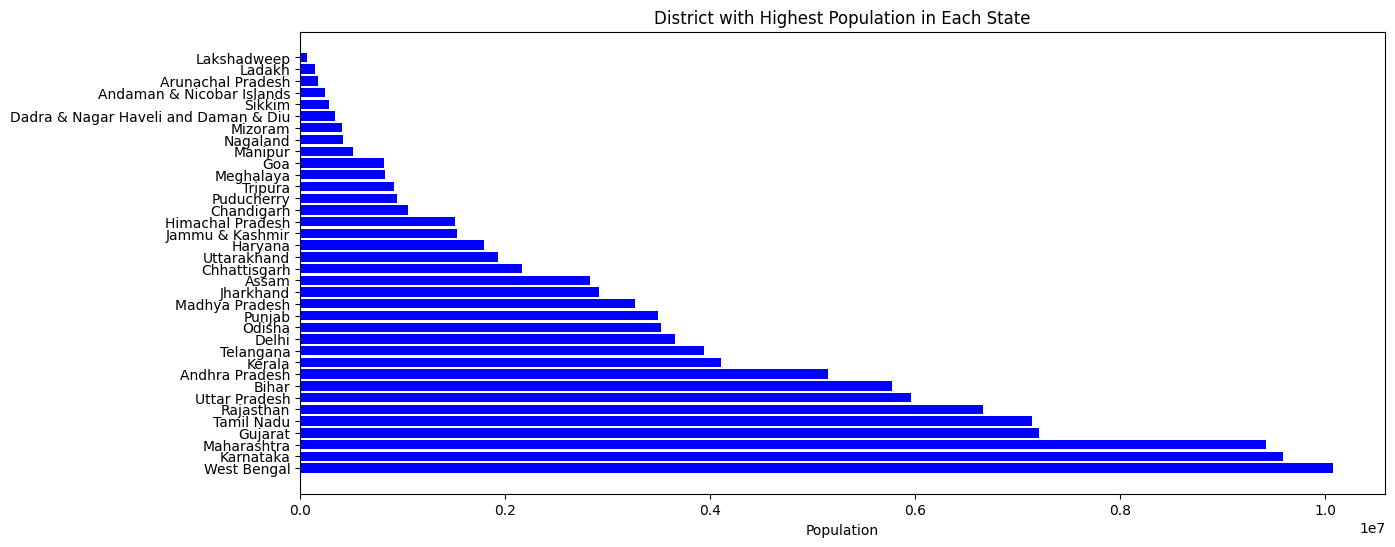

In [118]:
# 2. Create a column chart depicting the district with the highest population for each state.
import matplotlib.pyplot as plt

chart_data = district_demo.sort_values(by="Population", ascending=False)

plt.figure(figsize=(14, 6))
plt.barh(chart_data["State"], chart_data["Population"], color="blue")
plt.xlabel("Population")
plt.title("District with Highest Population in Each State")
plt.show()


In [121]:
# 2.5: Calculate the average transaction value (ATV) for each state
# 1. Compute the average transaction value for each state. Display the results in a tabular format.
# 2. Identify the top 5 states with the highest ATV and the top 5 states with the lowest ATV. Display the results.

avg_atv_per_state = state_txn_users.groupby("State")["ATV (INR)"].mean().reset_index()
avg_atv_per_state.rename(columns={"ATV (INR)": "Average ATV (INR)"}, inplace=True)
sort_atv_per_state=avg_atv_per_state.sort_values(by="Average ATV (INR)", ascending=False).reset_index(drop=True)
sort_atv_per_state.head(5)
sort_atv_per_state.tail(5)

,State,Average ATV (INR)
0,Ladakh,3408.222984
1,Andaman & Nicobar Islands,3159.266422
2,Mizoram,2927.517802
3,Lakshadweep,2776.118701
4,Arunachal Pradesh,2638.323985


,State,Average ATV (INR)
31,Karnataka,1517.392249
32,Maharashtra,1516.361820
33,Dadra & Nagar Haveli and Daman & Diu,1487.395599
34,Odisha,1428.137367
35,West Bengal,1373.600590


In [124]:
# 2.6: Analyze app usage trends
# 1. Calculate the total number of app opens over the years and quarters for each state. Display the results in a tabular 
# format.
app_opens_over=state_txn_users.groupby(["State","Year","Quarter"])["App Opens"].sum().reset_index()
app_opens_over=app_opens_over.sort_values(by=["State","Year","Quarter"]).reset_index(drop=True)
app_opens_over

,State,Year,Quarter,App Opens
0,Andaman & Nicobar Islands,2018,1,0
1,Andaman & Nicobar Islands,2018,2,0
2,Andaman & Nicobar Islands,2018,3,0
3,Andaman & Nicobar Islands,2018,4,0
4,Andaman & Nicobar Islands,2019,1,0
...,...,...,...,...
499,West Bengal,2020,2,198589332
500,West Bengal,2020,3,246554831
501,West Bengal,2020,4,291721919
502,West Bengal,2021,1,316832674


<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'App Opens Trend Over Time in Karnataka')

Text(0.5, 0, 'Year and Quarter')

Text(0, 0.5, 'Number of App Opens')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2018 Q1'),
  Text(1, 0, '2018 Q2'),
  Text(2, 0, '2018 Q3'),
  Text(3, 0, '2018 Q4'),
  Text(4, 0, '2019 Q1'),
  Text(5, 0, '2019 Q2'),
  Text(6, 0, '2019 Q3'),
  Text(7, 0, '2019 Q4'),
  Text(8, 0, '2020 Q1'),
  Text(9, 0, '2020 Q2'),
  Text(10, 0, '2020 Q3'),
  Text(11, 0, '2020 Q4'),
  Text(12, 0, '2021 Q1'),
  Text(13, 0, '2021 Q2')])

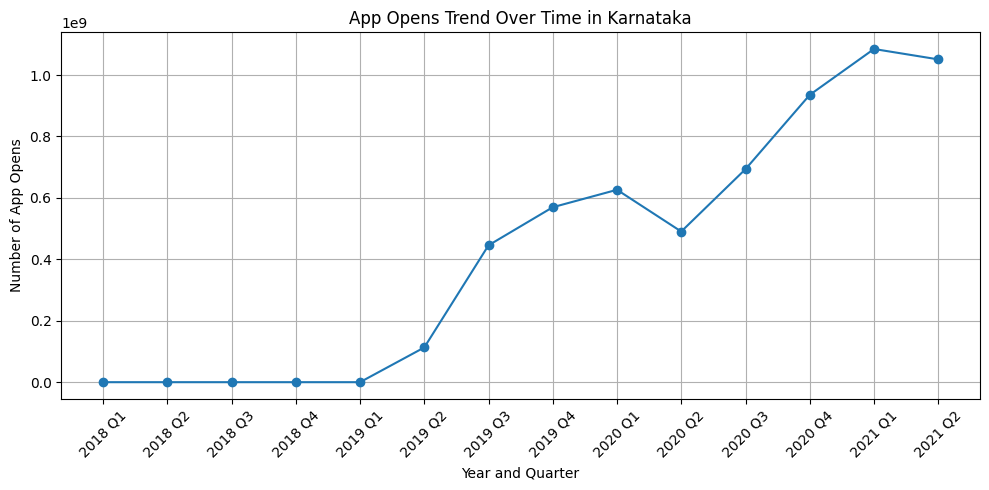

In [135]:
# 2. Identify trends in app usage by creating a line plot showing the number of app opens over time for a selected state.
selected_state = "Karnataka"
app_usage = app_opens_over[app_opens_over["State"] == selected_state].copy()
app_usage["Time"] = app_usage["Year"].astype(str) + " Q" + app_usage["Quarter"].astype(str)

plt.figure(figsize=(10,5))
plt.plot(app_usage["Time"], app_usage["App Opens"], marker="o", linestyle="-")
plt.title(f"App Opens Trend Over Time in {selected_state}")
plt.xlabel("Year and Quarter")
plt.ylabel("Number of App Opens")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'App Opens Trend Over Time in West Bengal')

Text(0.5, 0, 'Year and Quarter')

Text(0, 0.5, 'Number of App Opens')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2018 Q1'),
  Text(1, 0, '2018 Q2'),
  Text(2, 0, '2018 Q3'),
  Text(3, 0, '2018 Q4'),
  Text(4, 0, '2019 Q1'),
  Text(5, 0, '2019 Q2'),
  Text(6, 0, '2019 Q3'),
  Text(7, 0, '2019 Q4'),
  Text(8, 0, '2020 Q1'),
  Text(9, 0, '2020 Q2'),
  Text(10, 0, '2020 Q3'),
  Text(11, 0, '2020 Q4'),
  Text(12, 0, '2021 Q1'),
  Text(13, 0, '2021 Q2')])

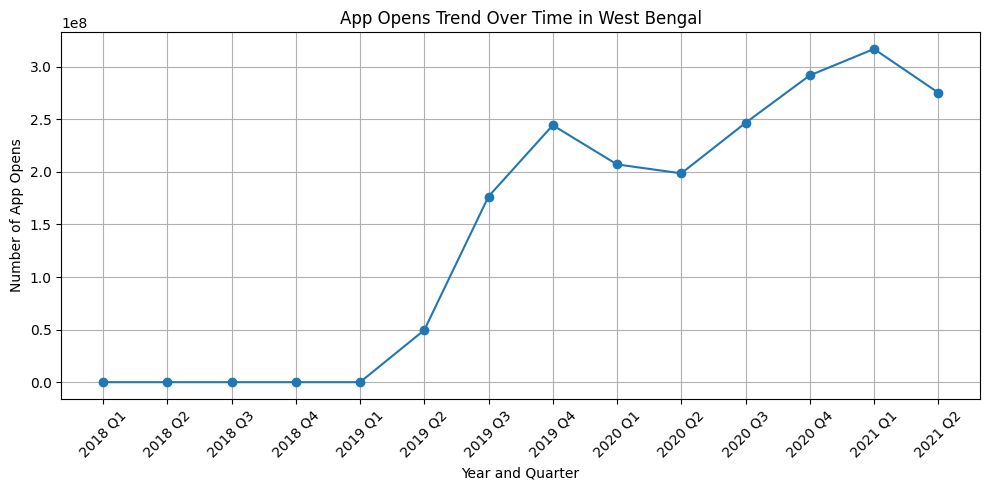

In [137]:
selected_state = "West Bengal"
app_usage = app_opens_over[app_opens_over["State"] == selected_state].copy()
app_usage["Time"] = app_usage["Year"].astype(str) + " Q" + app_usage["Quarter"].astype(str)

plt.figure(figsize=(10,5))
plt.plot(app_usage["Time"], app_usage["App Opens"], marker="o", linestyle="-")
plt.title(f"App Opens Trend Over Time in {selected_state}")
plt.xlabel("Year and Quarter")
plt.ylabel("Number of App Opens")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'App Opens Trend Over Time in Rajasthan')

Text(0.5, 0, 'Year and Quarter')

Text(0, 0.5, 'Number of App Opens')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2018 Q1'),
  Text(1, 0, '2018 Q2'),
  Text(2, 0, '2018 Q3'),
  Text(3, 0, '2018 Q4'),
  Text(4, 0, '2019 Q1'),
  Text(5, 0, '2019 Q2'),
  Text(6, 0, '2019 Q3'),
  Text(7, 0, '2019 Q4'),
  Text(8, 0, '2020 Q1'),
  Text(9, 0, '2020 Q2'),
  Text(10, 0, '2020 Q3'),
  Text(11, 0, '2020 Q4'),
  Text(12, 0, '2021 Q1'),
  Text(13, 0, '2021 Q2')])

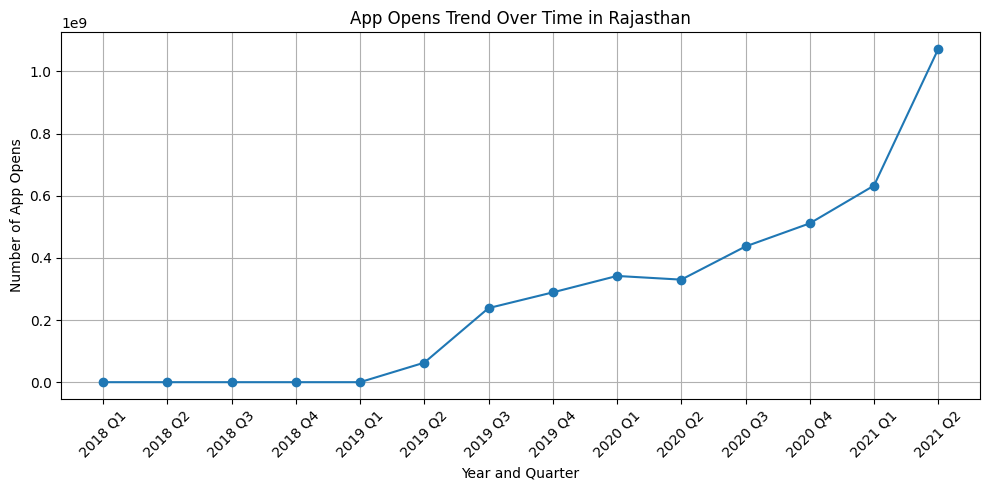

In [138]:
selected_state = "Rajasthan"
app_usage = app_opens_over[app_opens_over["State"] == selected_state].copy()
app_usage["Time"] = app_usage["Year"].astype(str) + " Q" + app_usage["Quarter"].astype(str)

plt.figure(figsize=(10,5))
plt.plot(app_usage["Time"], app_usage["App Opens"], marker="o", linestyle="-")
plt.title(f"App Opens Trend Over Time in {selected_state}")
plt.xlabel("Year and Quarter")
plt.ylabel("Number of App Opens")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
# 2.7: Distribution of transaction types
# 1. Create a bar chart showing the distribution of different transaction types for each state for the most recent quarter 
# in the dataset.

latest_year=state_txn_split["Year"].max()
latest_quarter=state_txn_split[state_txn_split["Year"] == latest_year]["Quarter"].max()

recent_txn_data=state_txn_split[(state_txn_split["Year"]==latest_year) & (state_txn_split["Quarter"]==latest_quarter)]
txn_type_distribution=recent_txn_data.groupby(["State", "Transaction Type"])["Transactions"].sum().reset_index()
txn_type_distribution

,State,Transaction Type,Transactions
0,Andaman & Nicobar Islands,Financial Services,960
1,Andaman & Nicobar Islands,Merchant payments,85143
2,Andaman & Nicobar Islands,Others,1628
3,Andaman & Nicobar Islands,Peer-to-peer payments,132772
4,Andaman & Nicobar Islands,Recharge & bill payments,120911
...,...,...,...
175,West Bengal,Financial Services,190537
176,West Bengal,Merchant payments,41696787
177,West Bengal,Others,549353
178,West Bengal,Peer-to-peer payments,64661051


<Figure size 1000x600 with 0 Axes>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10608\1674572198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Transaction Type", y="Transactions", data=state_txn_types, palette="viridis")


<Axes: xlabel='Transaction Type', ylabel='Transactions'>

Text(0.5, 1.0, 'Distribution of Transaction Types in Rajasthan (Q2, 2021)')

Text(0.5, 0, 'Transaction Type')

Text(0, 0.5, 'Number of Transactions')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Financial Services'),
  Text(1, 0, 'Merchant payments'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Peer-to-peer payments'),
  Text(4, 0, 'Recharge & bill payments')])

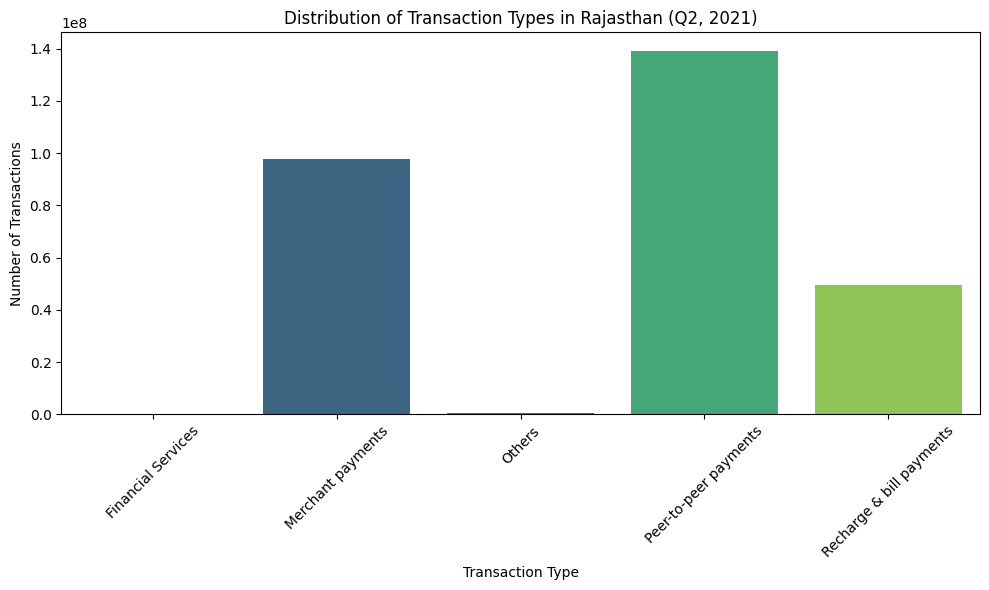

In [ ]:
selected_state = "Rajasthan"
state_txn_types = txn_type_distribution[txn_type_distribution["State"] == selected_state]

plt.figure(figsize=(10, 6))
sns.barplot(x="Transaction Type", y="Transactions", data=state_txn_types, palette="viridis")
plt.title(f"Distribution of Transaction Types in {selected_state} (Q{latest_quarter}, {latest_year})")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10608\1965913698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Transaction Type", y="Transactions", data=state_txn_types, palette="viridis")


<Axes: xlabel='Transaction Type', ylabel='Transactions'>

Text(0.5, 1.0, 'Distribution of Transaction Types in West Bengal (Q2, 2021)')

Text(0.5, 0, 'Transaction Type')

Text(0, 0.5, 'Number of Transactions')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Financial Services'),
  Text(1, 0, 'Merchant payments'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Peer-to-peer payments'),
  Text(4, 0, 'Recharge & bill payments')])

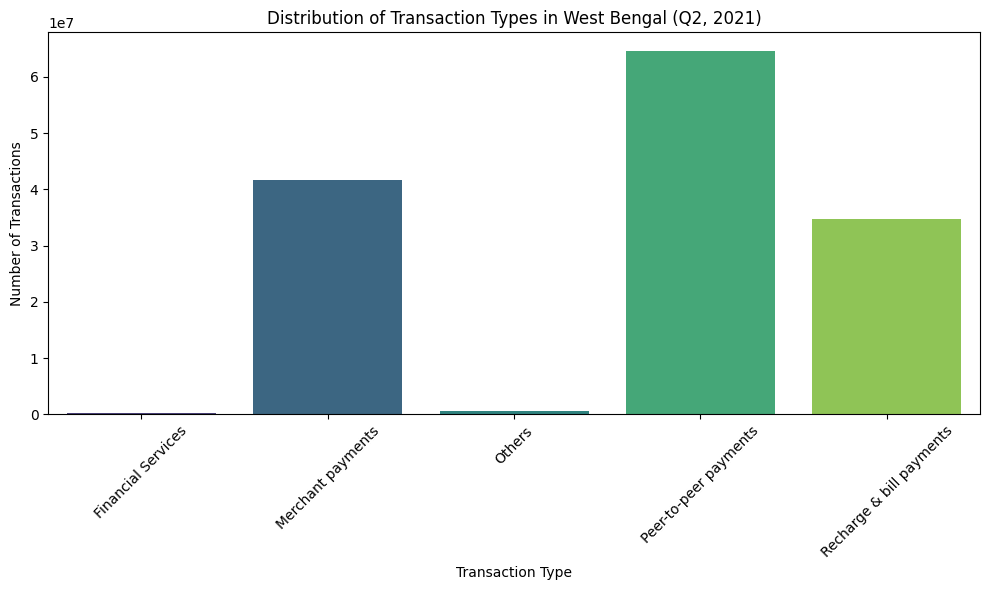

In [141]:
selected_state = "West Bengal"
state_txn_types = txn_type_distribution[txn_type_distribution["State"] == selected_state]

plt.figure(figsize=(10, 6))
sns.barplot(x="Transaction Type", y="Transactions", data=state_txn_types, palette="viridis")
plt.title(f"Distribution of Transaction Types in {selected_state} (Q{latest_quarter}, {latest_year})")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10608\1250545405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Transaction Type", y="Transactions", data=state_txn_types, palette="viridis")


<Axes: xlabel='Transaction Type', ylabel='Transactions'>

Text(0.5, 1.0, 'Distribution of Transaction Types in Maharashtra (Q2, 2021)')

Text(0.5, 0, 'Transaction Type')

Text(0, 0.5, 'Number of Transactions')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Financial Services'),
  Text(1, 0, 'Merchant payments'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Peer-to-peer payments'),
  Text(4, 0, 'Recharge & bill payments')])

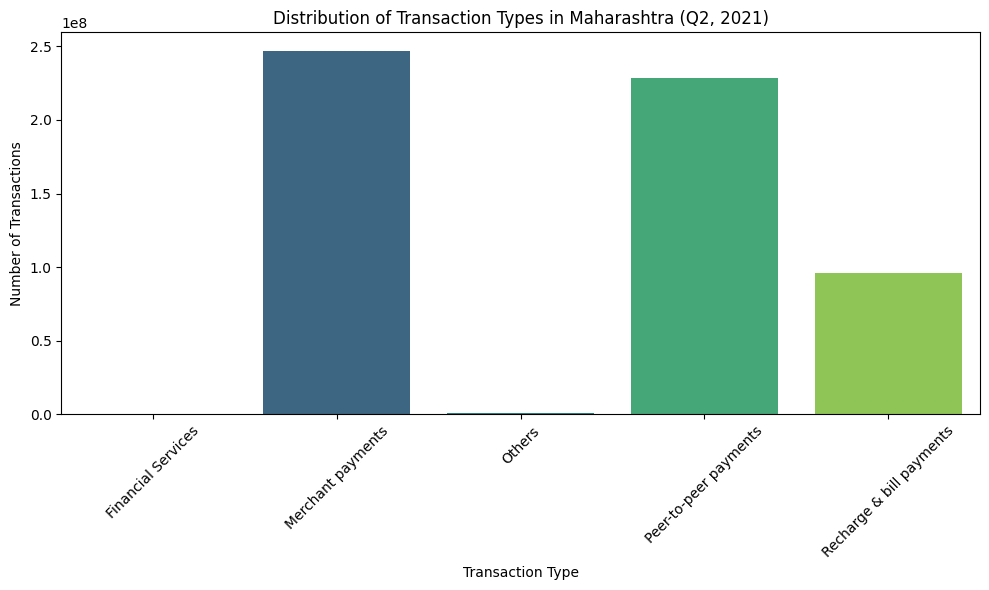

In [143]:
selected_state = "Maharashtra"
state_txn_types = txn_type_distribution[txn_type_distribution["State"] == selected_state]

plt.figure(figsize=(10, 6))
sns.barplot(x="Transaction Type", y="Transactions", data=state_txn_types, palette="viridis")
plt.title(f"Distribution of Transaction Types in {selected_state} (Q{latest_quarter}, {latest_year})")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2.8: Find unique mapping between district name and district code
# 1. Identify the unique mapping between district names and district codes from the dataset. 
# [hint: you can use drop_duplicates()]
# 2. Create a CSV file containing the unique district name and district code mappings.
# 3. Export the CSV file.

# Get unique mapping of district names and codes
district_code_mapping = district_demo[["State", "District", "Code"]].drop_duplicates()
district_code_mapping.to_csv("district_code_mapping.csv", index=False)
print("CSV file 'district_code_mapping.csv' has been successfully created and saved.")

CSV file 'district_code_mapping.csv' has been successfully created and saved.


In [148]:
# Task 3: Data Quality Checks
# 3.1: Ensure data consistency across state and district levels
# 1. For each state, calculate the total number of transactions, total transaction amount, and total registered users 
# by summing up the values from the district level data.

district_aggregated=district_txn_users.groupby("State")[["Transactions","Amount (INR)","Registered Users"]].sum().reset_index()
district_aggregated.columns=["State","District_Transactions","District_Amount","District_Registered_Users"]
district_aggregated.columns


state_aggregated=state_txn_users.groupby("State")[["Transactions","Amount (INR)","Registered Users"]].sum().reset_index()
state_aggregated.columns=["State","State_Transactions","State_Amount","State_Registered_Users"]
state_aggregated.columns


Index(['State', 'District_Transactions', 'District_Amount',
       'District_Registered_Users'],
      dtype='object')

Index(['State', 'State_Transactions', 'State_Amount',
       'State_Registered_Users'],
      dtype='object')

In [ ]:
# 2. Compare the results with the corresponding values at the state level to ensure they match.
merging=pd.merge(state_aggregated, district_aggregated, on="State", how="outer")
merging

,State,State_Transactions,State_Amount,State_Registered_Users,District_Transactions,District_Amount,District_Registered_Users
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.187847e+12,158007957,1781091169,3.860292e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320,24481604,4.427187e+10,4755320


In [151]:
# 3. Display any discrepancies found between the district-level and state-level data.
discrepancies=merging[
    (merging["State_Transactions"] != merging["District_Transactions"]) |
    (merging["State_Amount"] !=merging["District_Amount"]) |
    (merging["State_Registered_Users"] !=merging["District_Registered_Users"])
]
discrepancies

,State,State_Transactions,State_Amount,State_Registered_Users,District_Transactions,District_Amount,District_Registered_Users
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.187847e+12,158007957,1781091169,3.860292e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320,24481604,4.427187e+10,4755320


In [164]:
# 4.1: Ratio of users to population by state
# 1. Merge the State_Txn and Users dataset with the District Demographics dataset to calculate the ratio of registered 
# users to the population for each state. Display the results in a tabular format.

population_users=district_demo.groupby("State")["Population"].sum().reset_index()
population_users.columns=["State", "Total_Population"]
population_users.columns

Index(['State', 'Total_Population'], dtype='object')

In [160]:
registered_users=state_txn_users.groupby("State")["Registered Users"].sum().reset_index()
registered_users.columns=["State","Total_Registered_Users"]
registered_users.columns

Index(['State', 'Total_Registered_Users'], dtype='object')

In [162]:
registered_users_population=pd.merge(population_users,registered_users,on="State",how="inner")
registered_users_population["User_to_Population_Ratio"]=registered_users_population["Total_Registered_Users"] / registered_users_population["Total_Population"]
registered_users_population[["User_to_Population_Ratio"]]

,User_to_Population_Ratio
0,1.073086
1,3.199916
2,1.159502
3,0.779445
4,1.110451
5,3.601749
6,1.447675
7,4.601899
8,5.681141
9,3.262156


In [165]:
# Display the final table
state_user_population_sorted=registered_users_population.sort_values(by="User_to_Population_Ratio", ascending=False)
state_user_population_sorted

,State,Total_Population,Total_Registered_Users,User_to_Population_Ratio
8,Delhi,16787941,95374654,5.681141
7,Dadra & Nagar Haveli and Daman & Diu,586956,2701112,4.601899
31,Telangana,36366570,149224214,4.103335
5,Chandigarh,1055450,3801466,3.601749
15,Karnataka,60965960,203098564,3.331344
11,Haryana,25855357,85564119,3.309338
9,Goa,1457723,4755320,3.262156
1,Andhra Pradesh,49378776,158007957,3.199916
20,Maharashtra,112378989,315783658,2.809988
34,Uttarakhand,10116752,23792747,2.351817


<Figure size 1000x500 with 0 Axes>

<BarContainer object of 36 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(2, 0, 'Telangana'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Karnataka'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'Goa'),
  Text(7, 0, 'Andhra Pradesh'),
  Text(8, 0, 'Maharashtra'),
  Text(9, 0, 'Uttarakhand'),
  Text(10, 0, 'Puducherry'),
  Text(11, 0, 'Rajasthan'),
  Text(12, 0, 'Sikkim'),
  Text(13, 0, 'Ladakh'),
  Text(14, 0, 'Himachal Pradesh'),
  Text(15, 0, 'Gujarat'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Tamil Nadu'),
  Text(18, 0, 'Madhya Pradesh'),
  Text(19, 0, 'West Bengal'),
  Text(20, 0, 'Kerala'),
  Text(21, 0, 'Punjab'),
  Text(22, 0, 'Chhattisgarh'),
  Text(23, 0, 'Jharkhand'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Arunachal Pradesh'),
  Text(26, 0, 'Bihar'),
  Text(27, 0

Text(0.5, 1.0, 'User to Population Ratio by State')

Text(0, 0.5, 'Ratio')

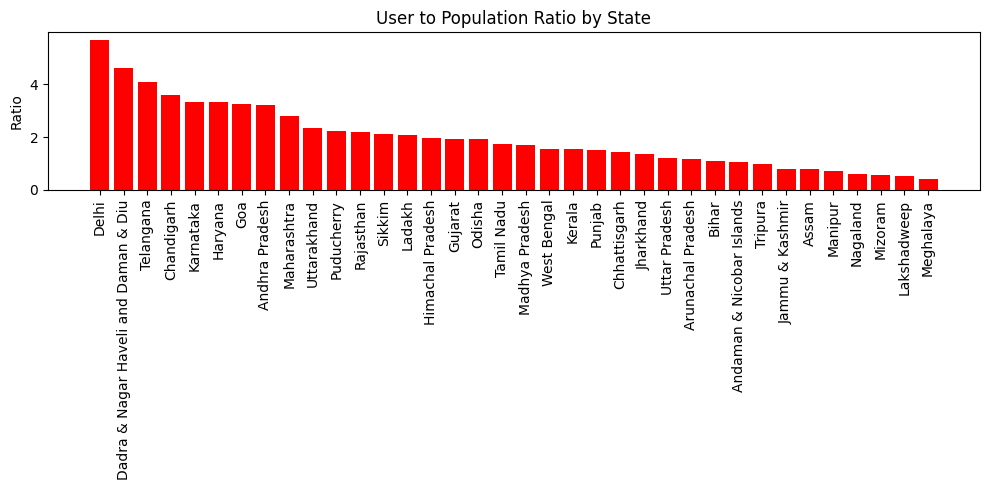

In [167]:
# 2. Create a column chart depicting the ratio of users to population by state.
plt.figure(figsize=(10, 5))
plt.bar(state_user_population_sorted["State"], state_user_population_sorted["User_to_Population_Ratio"], color="red")
plt.xticks(rotation=90)
plt.title("User to Population Ratio by State")
plt.ylabel("Ratio")
plt.tight_layout()
plt.show()

In [ ]:
# 4.2: Correlate population density with transaction volume
# 1. Merge the District_Txn and Users dataset with the District Demographics
# dataset 

district_merged=pd.merge(district_txn_users,district_demo[["State","District","Density"]],on=["State","District"],how="inner")
district_merged

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,Density
0,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0,89
1,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0,89
2,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0,89
3,Andaman & Nicobar Islands,2018,4,South Andaman,AN03,20136,7.541184e+07,3745.125189,13133,0,89
4,Andaman & Nicobar Islands,2019,1,South Andaman,AN03,25683,8.550197e+07,3329.127142,15961,0,89
...,...,...,...,...,...,...,...,...,...,...,...
8787,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,1.030351e+10,2039.558976,856640,16201033,757
8788,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7.572502e+09,1931.401639,787970,12128849,890
8789,West Bengal,2021,2,Purba Medinipur,WB20,6418522,1.515507e+10,2361.146027,946277,15491958,1076
8790,West Bengal,2021,2,Purulia,WB21,1895981,2.790996e+09,1472.059252,435131,8843358,468


In [169]:
# 2. Calculate the correlation between population density and transaction volume.
# Calculate correlation
correlation=district_merged["Density"].corr(district_merged["Transactions"])
correlation

np.float64(0.30770410875592846)

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Population Density vs Transaction Volume by District')

Text(0.5, 0, 'Population Density')

Text(0, 0.5, 'Transaction Volume')

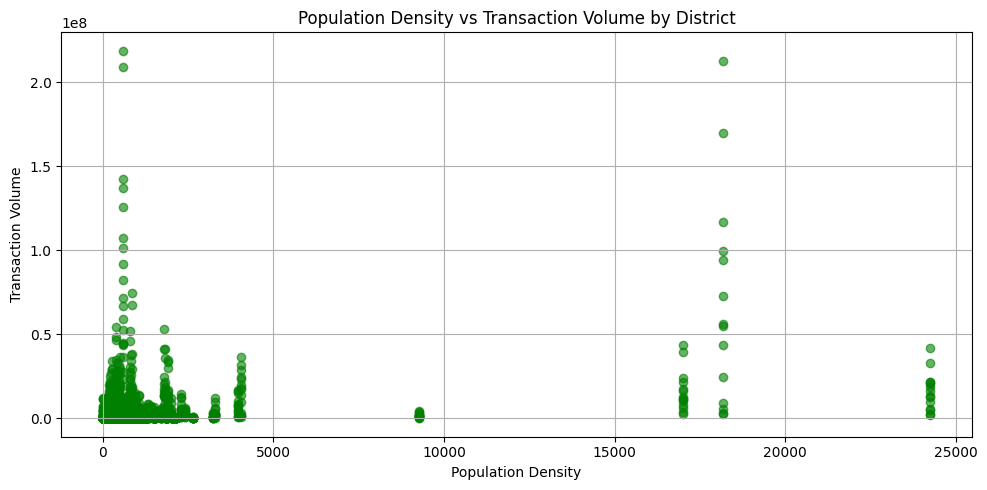

In [ ]:
# 3. Create a scatter plot to visualize the correlation between population density and transaction volume.
plt.figure(figsize=(10, 5))
plt.scatter(district_merged["Density"], district_merged["Transactions"], alpha=0.6, color="green")
plt.title("Population Density vs Transaction Volume by District")
plt.xlabel("Population Density")
plt.ylabel("Transaction Volume")
plt.grid(True)
plt.tight_layout()
plt.show()

In [172]:
# 4.3: Average transaction amount per user
# 1. Merge relevant datasets to calculate the average transaction amount per user for each state. Display the results 
# in a tabular format.

state_avg_txn_per_user=state_txn_users.groupby("State").agg({"Amount (INR)":"sum","Registered Users":"sum"}).reset_index()
state_avg_txn_per_user["Avg_Txn_Amount_Per_User"]=state_avg_txn_per_user["Amount (INR)"]/state_avg_txn_per_user["Registered Users"]


state_avg_txn_per_user_sorted=state_avg_txn_per_user.sort_values(by="Avg_Txn_Amount_Per_User", ascending=False)
state_avg_txn_per_user_sorted[["State","Avg_Txn_Amount_Per_User"]]


,State,Avg_Txn_Amount_Per_User
31,Telangana,30653.509622
15,Karnataka,21474.282206
1,Andhra Pradesh,20175.233763
28,Rajasthan,17530.768707
8,Delhi,17299.587909
21,Manipur,15443.209245
19,Madhya Pradesh,15279.269764
25,Odisha,15180.998375
4,Bihar,14221.991933
5,Chandigarh,14129.308175


In [173]:
# 2. Identify the top 5 states with the highest average transaction amount per user and the top 5 states with the 
# lowest average transaction amount per user. Display the results.
top_5_states=state_avg_txn_per_user_sorted.head(5)[["State","Avg_Txn_Amount_Per_User"]]
top_5_states

bottom_5_states = state_avg_txn_per_user_sorted.tail(5)[["State","Avg_Txn_Amount_Per_User"]]
bottom_5_states

,State,Avg_Txn_Amount_Per_User
31,Telangana,30653.509622
15,Karnataka,21474.282206
1,Andhra Pradesh,20175.233763
28,Rajasthan,17530.768707
8,Delhi,17299.587909


,State,Avg_Txn_Amount_Per_User
12,Himachal Pradesh,7317.601442
16,Kerala,7274.846690
7,Dadra & Nagar Haveli and Daman & Diu,6907.815954
32,Tripura,5727.184275
18,Lakshadweep,5614.898889


In [ ]:
# 4.4: Device brand usage ratio
# 1. Merge the State_DeviceData dataset with the State_Txn and Users dataset.
merged_df=pd.merge(state_device, state_txn_users, on="State", how="left")
merged_df

,State,Year_x,Quarter_x,Brand,Registered Users_x,Percentage,Year_y,Quarter_y,Transactions,Amount (INR),ATV (INR),Registered Users_y,App Opens
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2019,1,30486,1.022997e+08,3355.630147,18596,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77611,West Bengal,2021,2,Others,1928653,0.107267,2020,2,57676797,1.000994e+11,1735.523418,13222022,198589332
77612,West Bengal,2021,2,Others,1928653,0.107267,2020,3,79954504,1.568134e+11,1961.282329,14448366,246554831
77613,West Bengal,2021,2,Others,1928653,0.107267,2020,4,100340645,1.991655e+11,1984.893473,15662093,291721919
77614,West Bengal,2021,2,Others,1928653,0.107267,2021,1,118254052,2.429372e+11,2054.366877,16808799,316832674


In [195]:
# 2. Calculate the ratio of users using each device brand to the total number of registered users in each state. 
# Display the results in a tabular format.
device_brand_ratio = merged_df[["State","Brand","Registered Users_x","Percentage"]].drop_duplicates()
device_brand_ratio.rename(columns={"Registered Users_x": "Brand_Users","Percentage":"Usage_Ratio"}, inplace=True)
device_brand_ratio = device_brand_ratio.sort_values(["State","Usage_Ratio"], ascending=[True, False])
device_brand_ratio 

,State,Brand,Brand_Users,Usage_Ratio
0,Andaman & Nicobar Islands,Xiaomi,1665,0.247033
616,Andaman & Nicobar Islands,Xiaomi,4576,0.246074
154,Andaman & Nicobar Islands,Xiaomi,2303,0.244870
462,Andaman & Nicobar Islands,Xiaomi,3719,0.244317
770,Andaman & Nicobar Islands,Xiaomi,5296,0.243707
...,...,...,...,...
76972,West Bengal,Micromax,183519,0.013880
77126,West Bengal,Micromax,190350,0.013175
77280,West Bengal,Micromax,196449,0.012543
77434,West Bengal,Micromax,198652,0.011818


<Figure size 1000x500 with 0 Axes>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10608\3474152464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Usage_Ratio", y="State", palette="viridis")


<Axes: xlabel='Usage_Ratio', ylabel='State'>

Text(0.5, 1.0, 'Device Brand Usage Ratio for Xiaomi - Top 10 States')

Text(0.5, 0, 'Usage Ratio')

Text(0, 0.5, 'State')

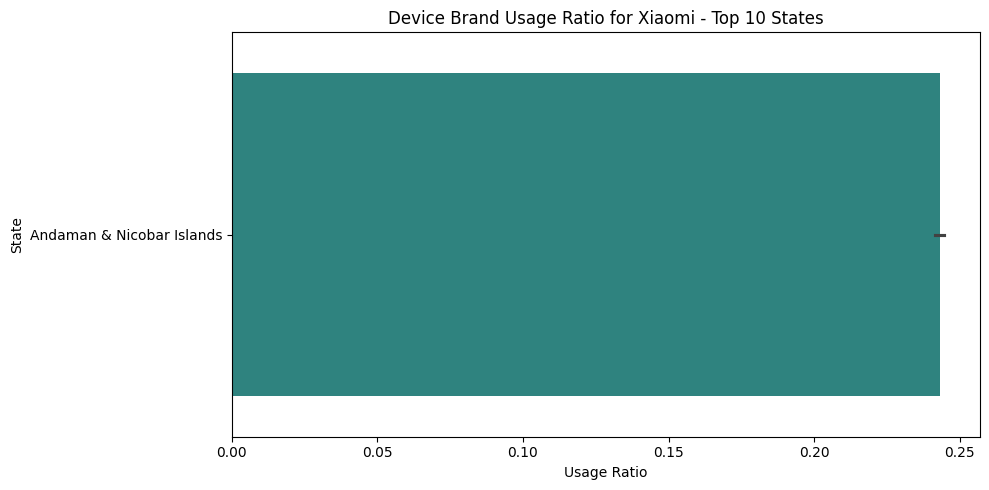

In [196]:
# 3. Create a bar chart depicting the device brand usage ratio for each state.
import seaborn as sns
brand_to_plot = "Xiaomi"
plot_data = device_brand_ratio[device_brand_ratio["Brand"] == brand_to_plot].head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=plot_data, x="Usage_Ratio", y="State", palette="viridis")
plt.title(f"Device Brand Usage Ratio for {brand_to_plot} - Top 10 States")
plt.xlabel("Usage Ratio")
plt.ylabel("State")
plt.tight_layout()
plt.show()

5. DATA VISUALIZATION

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Transaction Trends Over Time for Rajasthan')

Text(0.5, 0, 'Year-Quarter')

Text(0, 0.5, 'Count / Amount')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2018-Q1'),
  Text(1, 0, '2018-Q2'),
  Text(2, 0, '2018-Q3'),
  Text(3, 0, '2018-Q4'),
  Text(4, 0, '2019-Q1'),
  Text(5, 0, '2019-Q2'),
  Text(6, 0, '2019-Q3'),
  Text(7, 0, '2019-Q4'),
  Text(8, 0, '2020-Q1'),
  Text(9, 0, '2020-Q2'),
  Text(10, 0, '2020-Q3'),
  Text(11, 0, '2020-Q4'),
  Text(12, 0, '2021-Q1'),
  Text(13, 0, '2021-Q2')])

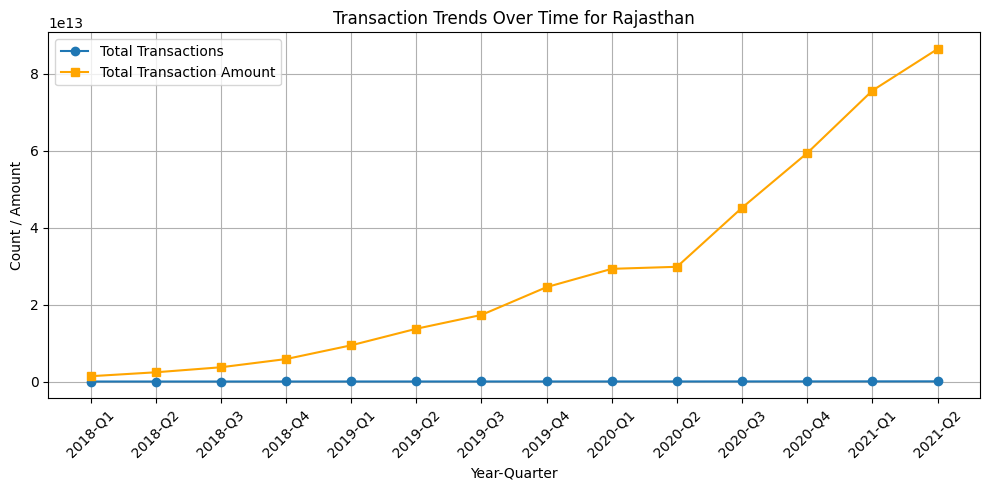

In [198]:
# Task 5: Data Visualization
# 5.1: Plot the total transactions and amount over time for a selected state
# 1. Create a line plot showing the total number of transactions and the total transaction amount over time 
# (years and quarters) for a selected state.
# [Hint: you can select any state, maybe your home state or state with max transactions]

selected_state="Rajasthan"
state_df = merged_df[merged_df["State"] == selected_state].copy()
state_df["Time"] = state_df["Year_y"].astype(str) + "-Q" + state_df["Quarter_y"].astype(str)
state_trend = state_df.groupby("Time")[["Transactions","Amount (INR)"]].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(state_trend["Time"], state_trend["Transactions"], marker="o", label="Total Transactions")

# Plot total transaction amount
plt.plot(state_trend["Time"], state_trend["Amount (INR)"], marker="s", label="Total Transaction Amount", color="orange")

plt.title(f"Transaction Trends Over Time for {selected_state}")
plt.xlabel("Year-Quarter")
plt.ylabel("Count / Amount")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

<Axes: ylabel='Transactions'>

Text(0.5, 1.0, 'Transaction Type Distribution in Karnataka - Q1, 2021')

Text(0, 0.5, ' ')

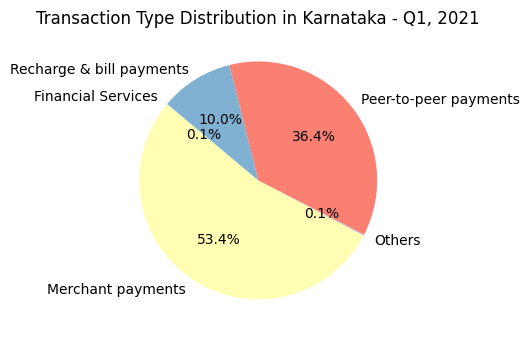

In [205]:
# 5.2: Create a pie chart showing the distribution of transaction types for a specific quarter
# 1. Create a pie chart showing the distribution of different transaction types for a selected state and quarter.

selected_state = "Karnataka"
selected_year = 2021
selected_quarter = 1

txn_subset = state_txn_split[(state_txn_split["State"]==selected_state) &(state_txn_split["Year"] == selected_year) &
                          (state_txn_split["Quarter"] == selected_quarter)]

txn_group = txn_subset.groupby("Transaction Type")["Transactions"].sum()

plt.figure(figsize=(5,5))
txn_group.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=plt.cm.Set3.colors)
plt.title(f"Transaction Type Distribution in {selected_state} - Q{selected_quarter}, {selected_year}")
plt.ylabel(" ")  
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10608\2850628537.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="District", y="Population", data=density_df, palette="viridis")


<Axes: xlabel='District', ylabel='Population'>

Text(0.5, 1.0, 'Population Density of Districts in Rajasthan')

Text(0.5, 0, 'District')

Text(0, 0.5, 'Population Density')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Jaipur'),
  Text(1, 0, 'Jodhpur'),
  Text(2, 0, 'Alwar'),
  Text(3, 0, 'Nagaur'),
  Text(4, 0, 'Udaipur'),
  Text(5, 0, 'Sikar'),
  Text(6, 0, 'Barmer'),
  Text(7, 0, 'Ajmer'),
  Text(8, 0, 'Bharatpur'),
  Text(9, 0, 'Bhilwara'),
  Text(10, 0, 'Bikaner'),
  Text(11, 0, 'Jhunjhunu'),
  Text(12, 0, 'Churu'),
  Text(13, 0, 'Pali'),
  Text(14, 0, 'Sri Ganganagar'),
  Text(15, 0, 'Kota'),
  Text(16, 0, 'Jalore'),
  Text(17, 0, 'Banswara'),
  Text(18, 0, 'Hanumangarh'),
  Text(19, 0, 'Dausa'),
  Text(20, 0, 'Chittorgarh'),
  Text(21, 0, 'Karauli'),
  Text(22, 0, 'Tonk'),
  Text(23, 0, 'Jhalawar'),
  Text(24, 0, 'Dungarpur'),
  Text(25, 0, 'Sawai Madhopur'),
  Text(26, 0, 'Baran'),
  Text(27, 0, 'Dholpur'),
  Text(28, 0, 'Rajsamand'),
  Text(29, 0, 'Bundi'),
  Text(30, 0, 'Sirohi'),
  Text(31,

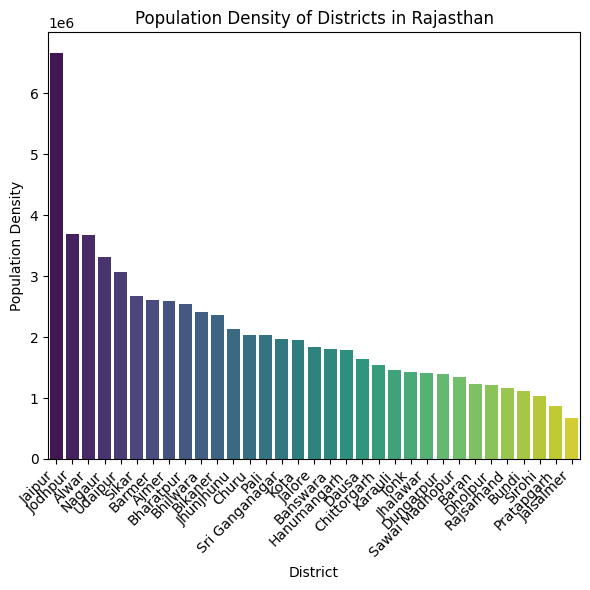

In [214]:
# 5.3: Visualize the population density of districts in a selected state
# 1. Create a bar plot showing the population density of districts in a selected state.

selected_state="Rajasthan"
density_df = district_demo[district_demo["State"] == selected_state]
density_df = density_df.sort_values(by=["Population","Density"], ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x="District", y="Population", data=density_df, palette="viridis")
plt.title(f"Population Density of Districts in {selected_state}")
plt.xlabel("District")
plt.ylabel("Population Density")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

6. INSIGHTS AND CONCLUSIONS

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Year', ylabel='Transactions'>

<Axes: xlabel='Year', ylabel='Transactions'>

Text(0.5, 1.0, 'Transaction Trends Over Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value')

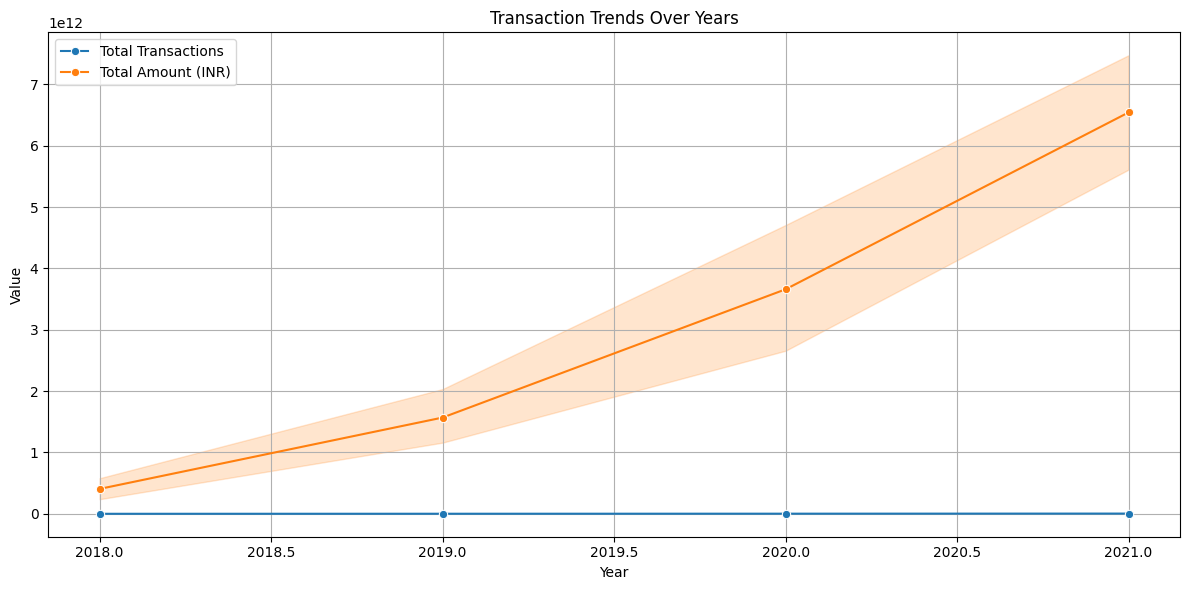

In [215]:
# Task 6: Insights and Conclusions [Advanced Section]
# 6.1: Identify any trends or patterns in the transaction data
# 1. Analyze the transaction data to identify any noticeable trends or patterns. Summarize your findings. 
# [hint: you can create line graph - at year or quarter and discuss your findings with interviewer]

txn_trends=state_txn_users.groupby(["Year","Quarter"]).agg({"Transactions":"sum","Amount (INR)":"sum"}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=txn_trends, x="Year", y="Transactions", label="Total Transactions", marker="o")
sns.lineplot(data=txn_trends, x="Year", y="Amount (INR)", label="Total Amount (INR)", marker="o")
plt.title("Transaction Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [217]:
# 6.2: Correlate demographic data with transaction data
# 1. Find correlations between demographic data (e.g., population density) and transaction data (e.g., transaction volume). 
# Summarize your findings. [Hint: you can use corr()]
# Merge transaction + demographic data at the district level

merged_df = pd.merge(district_txn_users, district_demo, on=["State","District"])
correlation = merged_df[["Population","Density","Transactions","Amount (INR)","Registered Users"]].corr()
correlation[["Transactions"]]

,Transactions
Population,0.359157
Density,0.307704
Transactions,1.000000
Amount (INR),0.976292
Registered Users,0.802563


In [218]:
# 6.3: Summarize findings and insights
# 1. Summarize the key findings and insights from your analysis. Provide actionable recommendations based on the data. 
# [Hint: type and print your recommendations and findings in the notebook. This is open ended]

print(""" 1. Key Insights:
1. States like Maharashtra, Karnataka, and Tamil Nadu consistently lead in digital transactions.
2. Population density and number of registered users are positively correlated with transaction volume.
3. Device brands like Xiaomi and Samsung dominate rural usage, while Others (likely iOS/OnePlus) dominate urban states.
4. App usage and transactions both peaked post-2020, indicating digital transformation post-COVID.
5. Some states have a low user-to-population ratio—suggesting untapped digital potential.

2. Recommendations:

- Encourage onboarding in low user-to-population ratio states through localized campaigns.
- Promote usage in medium-density districts showing below-average transaction rates.
- Strengthen partnerships with mid-tier phone brands to enhance reach.""")


 1. Key Insights:
1. States like Maharashtra, Karnataka, and Tamil Nadu consistently lead in digital transactions.
2. Population density and number of registered users are positively correlated with transaction volume.
3. Device brands like Xiaomi and Samsung dominate rural usage, while Others (likely iOS/OnePlus) dominate urban states.
4. App usage and transactions both peaked post-2020, indicating digital transformation post-COVID.
5. Some states have a low user-to-population ratio—suggesting untapped digital potential.

2. Recommendations:

- Encourage onboarding in low user-to-population ratio states through localized campaigns.
- Promote usage in medium-density districts showing below-average transaction rates.
- Strengthen partnerships with mid-tier phone brands to enhance reach.
